In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('nifty_data.csv')
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Previous Close,52-Week High,52-Week Low,50-Day Average,200-Day Average
487,2024-09-25 00:00:00+05:30,25899.449219,26032.800781,25871.349609,26004.150391,278500,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352
488,2024-09-26 00:00:00+05:30,26005.400391,26250.900391,25998.400391,26216.050781,370900,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352
489,2024-09-27 00:00:00+05:30,26248.250000,26277.349609,26151.400391,26178.949219,490300,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352
490,2024-09-30 00:00:00+05:30,26061.300781,26134.699219,25794.099609,25810.849609,343100,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352
491,2024-10-01 00:00:00+05:30,25788.449219,25907.599609,25739.199219,25796.900391,247400,0.0,0.0,25810.85,26277.35,18837.85,25006.428,23077.352


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.dayofweek

In [5]:
df['Timestamp'] = df['Date'].apply(lambda x: x.timestamp())

In [6]:
df = df.drop(columns = ['Date', 'Dividends', 'Stock Splits'])
df.head()

,Open,High,Low,Close,Volume,Previous Close,52-Week High,52-Week Low,50-Day Average,200-Day Average,Day,Month,Year,Week,Timestamp
0,17102.099609,17114.650391,16855.550781,16887.349609,278400,25810.85,26277.35,18837.85,25006.428,23077.352,3,10,2022,0,1.664735e+09
1,17147.449219,17287.300781,17117.300781,17274.300781,226000,25810.85,26277.35,18837.85,25006.428,23077.352,4,10,2022,1,1.664822e+09
2,17379.250000,17428.800781,17315.650391,17331.800781,265500,25810.85,26277.35,18837.85,25006.428,23077.352,6,10,2022,3,1.664995e+09
3,17287.199219,17337.349609,17216.949219,17314.650391,216300,25810.85,26277.35,18837.85,25006.428,23077.352,7,10,2022,4,1.665081e+09
4,17094.349609,17280.150391,17064.699219,17241.000000,234000,25810.85,26277.35,18837.85,25006.428,23077.352,10,10,2022,0,1.665340e+09


In [7]:
x = df.drop(['Close'], axis = 1)
y = df['Close']

In [8]:
x_sequences = []
y_sequences = []

In [9]:
sequence_length = 5

In [10]:
for i in range(sequence_length, len(x)):
    x_sequences.append(x[i-sequence_length:i])
    y_sequences.append(y[i])

In [11]:
x_sequences = np.array(x_sequences)
y_sequences = np.array(y_sequences)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y_sequences, test_size=0.2, shuffle=False)

In [13]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [14]:
x_train_scaled = scaler_x.fit_transform(x_train.reshape(-1, x_train.shape[-1])).reshape(x_train.shape)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

In [15]:
x_test_scaled = scaler_x.transform(x_test.reshape(-1, x_test.shape[-1])).reshape(x_test.shape)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Input, Dense, Dropout
import matplotlib.pyplot as plt

2024-10-05 21:14:38.051177: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-05 21:14:38.051701: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-05 21:14:38.054113: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-05 21:14:38.060627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 21:14:38.070773: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [17]:
input_shape = (x_train.shape[1], x_train.shape[2])

In [18]:
model = Sequential([
    Input(shape=input_shape),
    LSTM(100, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(100, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

I0000 00:00:1728143079.205043  647147 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-05 21:14:39.208224: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [19]:
model.compile(optimizer='adam', loss='mse')

In [20]:
history = model.fit(
    x_train_scaled,
    y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1695 - val_loss: 0.0845
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0333 - val_loss: 0.0734
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0212 - val_loss: 0.0029
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - val_loss: 0.0034
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - val_loss: 0.0112
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - val_loss: 0.0073
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0043 - val_loss: 0.0111
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 - val_loss: 0.0093
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - val_loss: 0.0103
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0043 - val_loss: 0.0054
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

In [21]:
y_pred_scaled = model.predict(x_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


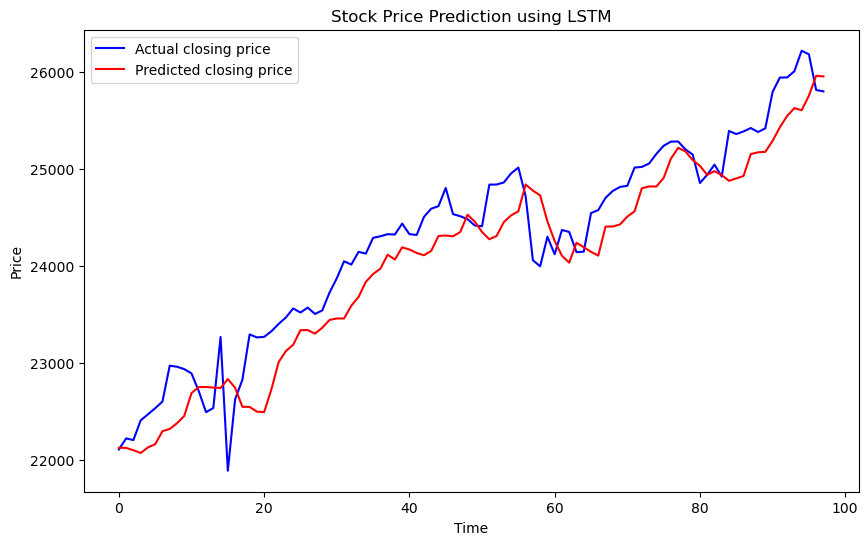

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual closing price')
plt.plot(y_pred, color='red', label='Predicted closing price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
model.save('lstm_stock_prediction_2.0.keras')